# Simulación

## Prueba practica_1  Predicción de casos de contagio de covid_19 de Republica Dominicana

Enunciado:

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:

Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:

    ▪	Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).
    
    ▪	Generar un modelo probabilistico con los datos.

    ▪	Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones

    •	Cual tiene una mejor prediccion

    •	Ventajas y desventajas de los modelos.

    •	Cual es el principal problema del modelo probabilistico

    •	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:

    ◦	Se debe establecer un modelo basado en modelos matematicos y probabilisticos.

    ◦	El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.

    ◦	Deben calcularse las siguientes métricas:

        ▪	Total de infectados dentro de 7 dias (matematico y probabilistico).


### Datos de Contagio de Republica Dominicana

In [130]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error,r2_score
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from xml.dom import minidom

In [131]:
from datetime import datetime,timedelta

url = 'owid-covid-data.csv'
df = pd.read_csv(url).fillna(0) 
df = df[df['location'].isin(['Dominican Republic'])]
df = df.loc[:,['date','total_cases']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01",FMT)).days)

x=np.arange(1,len(df)+1,1) 
y=np.array(df.values[:,1], dtype='float')

Numero de Contagios Actuales:
138829.0


Text(0, 0.5, 'Número Casos')

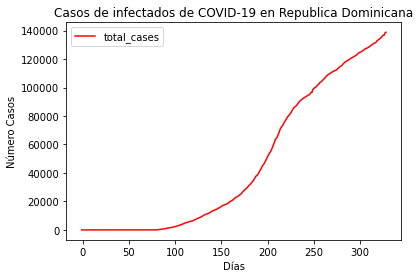

In [132]:
print("Numero de Contagios Actuales:")
print(y[len(y)-1])
ax = df.plot(x ='date', y='total_cases',color='red',title='Casos de infectados de COVID-19 en Republica Dominicana')
ax.set_xlabel("Días")
ax.set_ylabel("Número Casos")

# Modelo Lineal

Coefficients: 
 [488.35834288]
Independent term: 
 -33454.60421318945
Predicicon de casos de contagio para los proximos 7 dias
131122


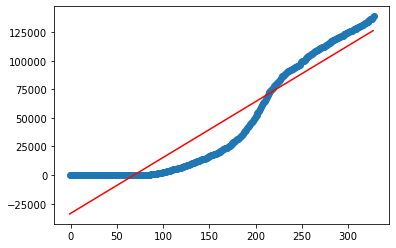

In [133]:
x = list(df.iloc [:, 0])
y = list(df.iloc [:, 1])

regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
y_prediccion = regr.predict([[len(x)+7]])

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

print("Predicicon de casos de contagio para los proximos 7 dias")
print(int(y_prediccion))
plt.scatter(x, y)
x_real = np.array(range(min(x), max(x)))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='red')
plt.show()

# Modelo Logistico

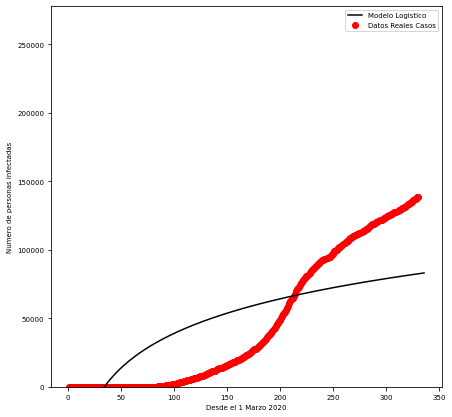

Prediccion de contagios en 7 dias
83072.04268777918


In [134]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression  

def modelo_logistico(x,a,b):
    return a+b*np.log(x)

x=np.arange(1,len(df)+1,1)
y=np.array(df.values[:,1])

exp_fit = curve_fit(modelo_logistico,x,y)

pred_x = list(range(min(x),max(x)+7))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=7)

plt.scatter(x,y,label="Datos Reales Casos",color="red")

val = [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico",color="black")
plt.legend()
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Numero de personas infectadas")
plt.ylim(0,max(y)*2)
plt.show()
print("Prediccion de contagios en 7 dias")
print(val[len(pred_x)-1])

# Modelo  Polinomial 

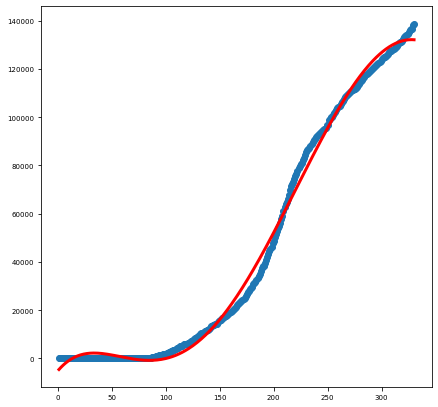

Prediccion de contagio en 7 dias 131479.97961


In [135]:
url = 'owid-covid-data.csv'
df = pd.read_csv(url).fillna(0) 
df = df[df['location'].isin(['Dominican Republic'])]
df = df.loc[:,['date','total_cases']]
x=np.arange(1,len(df)+1,1, dtype='float')
y=np.array(df.values[:,1], dtype='float')
fun_polimonial = np.poly1d(np.polyfit(x, y, 5))
y_pred=fun_polimonial(x)

plt.scatter(x, y)
plt.plot(x, y_pred, c='red',lw=3)  
plt.show()

print("Prediccion de contagio en 7 dias" , round(fun_pol(len(x)+7),5))

# Modelo Probabilistico

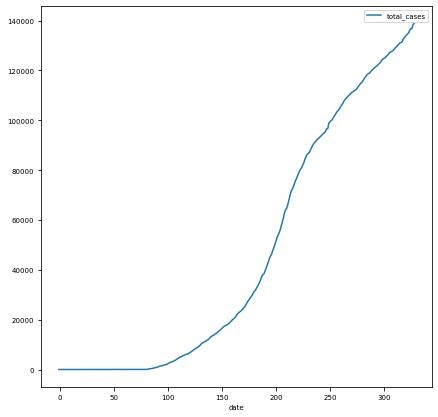

In [136]:
url = 'owid-covid-data.csv'
df = pd.read_csv(url).fillna(0) 
df = df[df['location'].isin(['Dominican Republic'])]
df = df.loc[:,['date','total_cases']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01",FMT)).days)

df
df.plot(x ='date', y='total_cases')

In [137]:
filtro = df["total_cases"][27:] 
media = filtro.mean()
mediana = filtro.median()
print('mediana' , mediana)
print('media', media)

url = 'owid-covid-data.csv'
df = pd.read_csv(url).fillna(0) 
df = df[df['location'].isin(['Dominican Republic'])]
df = df.loc[:,['date','total_cases']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01",FMT)).days)
y = list(df.iloc [:, 1]) 
x = list(df.iloc [:, 0]) 

mediana 29141.0
media 50525.92409240924


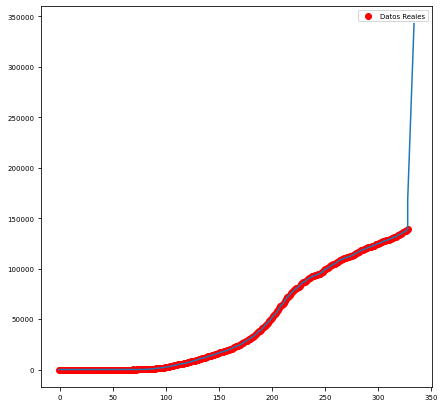

Prediccion de contagios de 7 dias
371957


In [138]:
plt.scatter(x, y,  label="Datos Reales",color = 'red') 
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
prediccion= int(y[-1] + mediana)
plt.plot(x, y) 

plt.legend()
plt.show()
print('Prediccion de contagios de 7 dias')
print(prediccion)

# Modelo Exponencial 

[nan nan]
nan


C:\Users\Damián Sumba\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


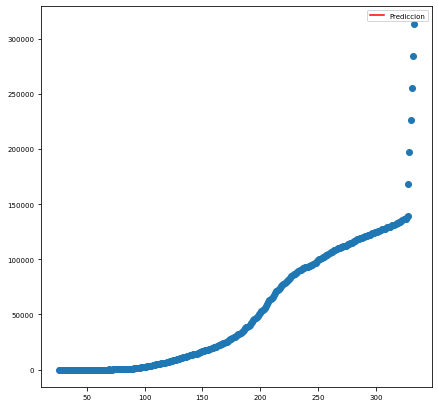

In [139]:
from scipy.optimize import curve_fit

x = x[27:len(x)-1]
y = y[27:len(y)-1]
curve_fit=np.polyfit(x,np.log(y),deg=1)
print(curve_fit)

pred_x=np.array(list(range(min(x),max(x)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"o")
plt.plot(pred_x,yx,label="Prediccion", color='red')
plt.legend()
print(yx[len(yx)-1])

## Cual tiene una mejor prediccion

#### Para mi criterio el modelo polinomial es el que mejor predicion tiene ya quie la curva de contagios para los proximos 7 dias esta casi similar con la curva de co0ntaguios de semanas anteriores.

## Ventajas y desventajas de los modelos.

• Lineal

    Ventajas Facil de entender y explicar,lo que es una ventaja al momento de exponer frente a un publico Es rapido de modelar La prediccion mejora con datos Historicos
    Desventajas No se puede modelar relaciones complejas, ecuaciones de n grados

• Logistico

    Ventajas Es muy eficaz y simple Los resultados son faciles de interpretar No se necesita de muchos recurosos La prediccion mejora con datos Historicos
    Desventajas No puede resolver directamente problemas no lineales La dependecia de las carateristicas es un proble es al tener datos historios que dependan uno del otro, el modelo no podra definir otros datos que no cumplan con esta dependecia de datos y por lo tanto fallara

• Polinomia

    Ventajas Se ajusta mejor a la curva al ser una ecuacion de grado n Modela curvas sin tener que modelar modelos complicados
    Desventajas El grado de precision depende del grado entre mayor sea el grado mas se ajusta a la curva pero al ser el grado mayo los datos se esparcen mas y tienden a fallar

• Exponencial

        Ventajas Al ser una ecuacion exponencial se generara una curva y esta curva servira para ajustarse a los datos reales y asi realizar una mejor predicion

        Desventajas Dependera mucho el grado de precion de como se genere dicha ecuacion exponencial, cuales son susa variables de

        A=poblacion Inicial
        r=tasa de crecimiento
        t=unidades de tiempo f(t)=A.r.exp(t)

## Cual es el principal problema del modelo probabilistico

A veces resulta poco preciso y puede ser difícil calcular o interpretar sus resultados.
Muchas veces es complicado especificar el marco de muestreo, pues hay menos precisión ya que por el los calculos de media y mediana los dotos pueden ser poco controlados ya que representan un crecimiento demaciado elevado.